# Decision Trees

In [2]:
import numpy as np
import matplotlib.pyplot as plt

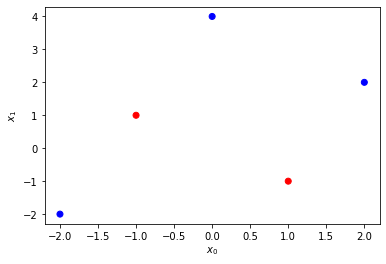

In [61]:
X = np.array([
    [-2, -2],
    [-1, 1],
    [0, 4],
    [1, -1],
    [2, 2]
])
y = np.array([0, 1 ,0, 1, 0])
plt.scatter(X[:, 0], X[:, 1], c= y, cmap = 'bwr')
plt.xlabel(r'$x_0$')
plt.ylabel(r'$x_1$')
plt.savefig('images/data.pdf', bbox_inches = 'tight')

In [32]:
def classify(X):
    x_idx = np.arange(len(X))
    ret = np.zeros(len(X)).astype(int)
    
    mask1 = X[:, 1] > 1.5
    mask2 = X[:, 0] < -1.5
    
    
    ret[mask1 | (~mask1&mask2)] = 0
    ret[(~mask1&~mask2)] = 1
    
    return ret


classify(X) == y

array([ True,  True,  True,  True,  True])

## Gini-Impurity

Probability that we would missclassify if we use distribution of labels.
- all the same = 0
- mixed = high


\begin{align}
1 - \sum_i{p_i^2}
\end{align}

In [62]:
p0 = np.mean(y)
p1 = 1 - p0
1 - (p0**2 + p1**2)

0.48

Two classes

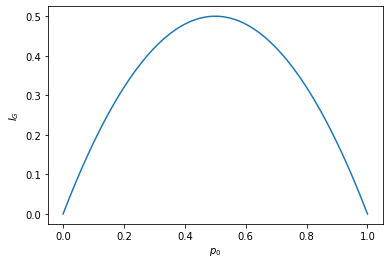

In [75]:
p0 = np.linspace(0, 1, 100)
gi = 2*(p0 - p0**2)
plt.plot(p0, gi)
plt.xlabel(r'$p_0$')
plt.ylabel(r'$I_G$')
plt.savefig('images/gini_idx.pdf', bbox_inches = 'tight')

For a split: weighted Impurity

In [58]:
split_idx = 1
split_value = 0.5

mask = (X[:, split_idx] <= split_value)
y1 = y[mask]
y2 = y[~mask]

# impurity for y1
p0 = np.mean(y1)
p1 = 1 - p0
imp1 = 1 - (p0**2 + p1**2)

# impurity for y2
p0 = np.mean(y2)
p1 = 1 - p0
imp2 = 1 - (p0**2 + p1**2)

imp1, imp2

(0.5, 0.4444444444444444)

Find best split according to Gini-Impurity

In [41]:
for x in X:
    for split_idx in range(len(x)):
        split_v = x[split_idx]
        
        mask = (X[:, split_idx] <= split_v)
        y1 = y[mask]
        y2 = y[~mask]
        
        if len(y1) > 0 and len(y2) > 0:
            # impurity for y1
            p0 = np.mean(y1)
            p1 = 1 - p0
            imp1 = 1 - (p0**2 + p1**2)

            # impurity for y2
            p0 = np.mean(y2)
            p1 = 1 - p0
            imp2 = 1 - (p0**2 + p1**2)

            w_imp = len(y1)/len(y)*imp1 + len(y2)/len(y)*imp2

            print(split_v, split_idx, w_imp)

-2 0 0.4
-2 1 0.4
-1 0 0.4666666666666667
1 1 0.26666666666666666
0 0 0.4666666666666667
1 0 0.4
-1 1 0.4666666666666667
2 1 0.4


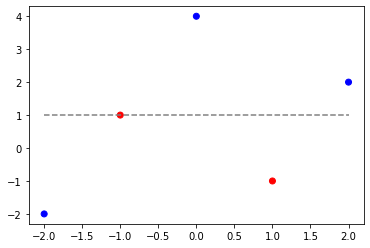

In [49]:
# x1 <= 1 wins
plt.scatter(X[:, 0], X[:, 1], c= y, cmap = 'bwr')
plt.plot([min(X[:, 0]), max(X[:, 0])], [1, 1], linestyle = '--', color = 'gray')

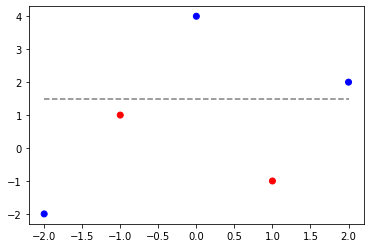

In [57]:
# x1 = 1 lies on datapoint, use average with next x1 value
v1 = 1
v2 = np.min(X[:, 1][X[:, 1] > v1])
v_new = 0.5*(v1 + v2)

plt.scatter(X[:, 0], X[:, 1], c= y, cmap = 'bwr')
plt.plot([min(X[:, 0]), max(X[:, 0])], [v_new, v_new], linestyle = '--', color = 'gray')